In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from datetime import datetime
import matplotlib as mpl

spreadsheet_id = "YOUR_SPREADSHEET_ID" # Replace with your Sheet ID
sheet_id = "0" # Replace with your GID (0 is usually the first sheet)

url = f"https://docs.google.com/spreadsheets/d/16HNvRGn6rM0YFKnyvNpQlfmxrgw8ugTsu9iZ6fjQORQ/export?gid=0&format=csv"


df = pd.read_csv(url)
df['Military_Time']=pd.to_datetime(df['Time'],format='%I:%M %p').dt.strftime('%H:%M')
df['datetime_col'] = pd.to_datetime(df['Date'] + ' ' + df['Military_Time'])
df.head()

,Date,Time,Volume [mL],Food,Total Feed Volume [mL],Military_Time,datetime_col
0,1/15/2026,3:00 PM,55,Thickened Breast Milk,82,15:00,2026-01-15 15:00:00
1,1/15/2026,6:00 PM,43,Thickened Breast Milk,82,18:00,2026-01-15 18:00:00
2,1/15/2026,9:00 PM,37,Thickened Breast Milk,102,21:00,2026-01-15 21:00:00
3,1/16/2026,1:00 AM,52,Thickened Breast Milk,102,01:00,2026-01-16 01:00:00
4,1/16/2026,5:00 AM,58,Thickened Breast Milk,102,05:00,2026-01-16 05:00:00


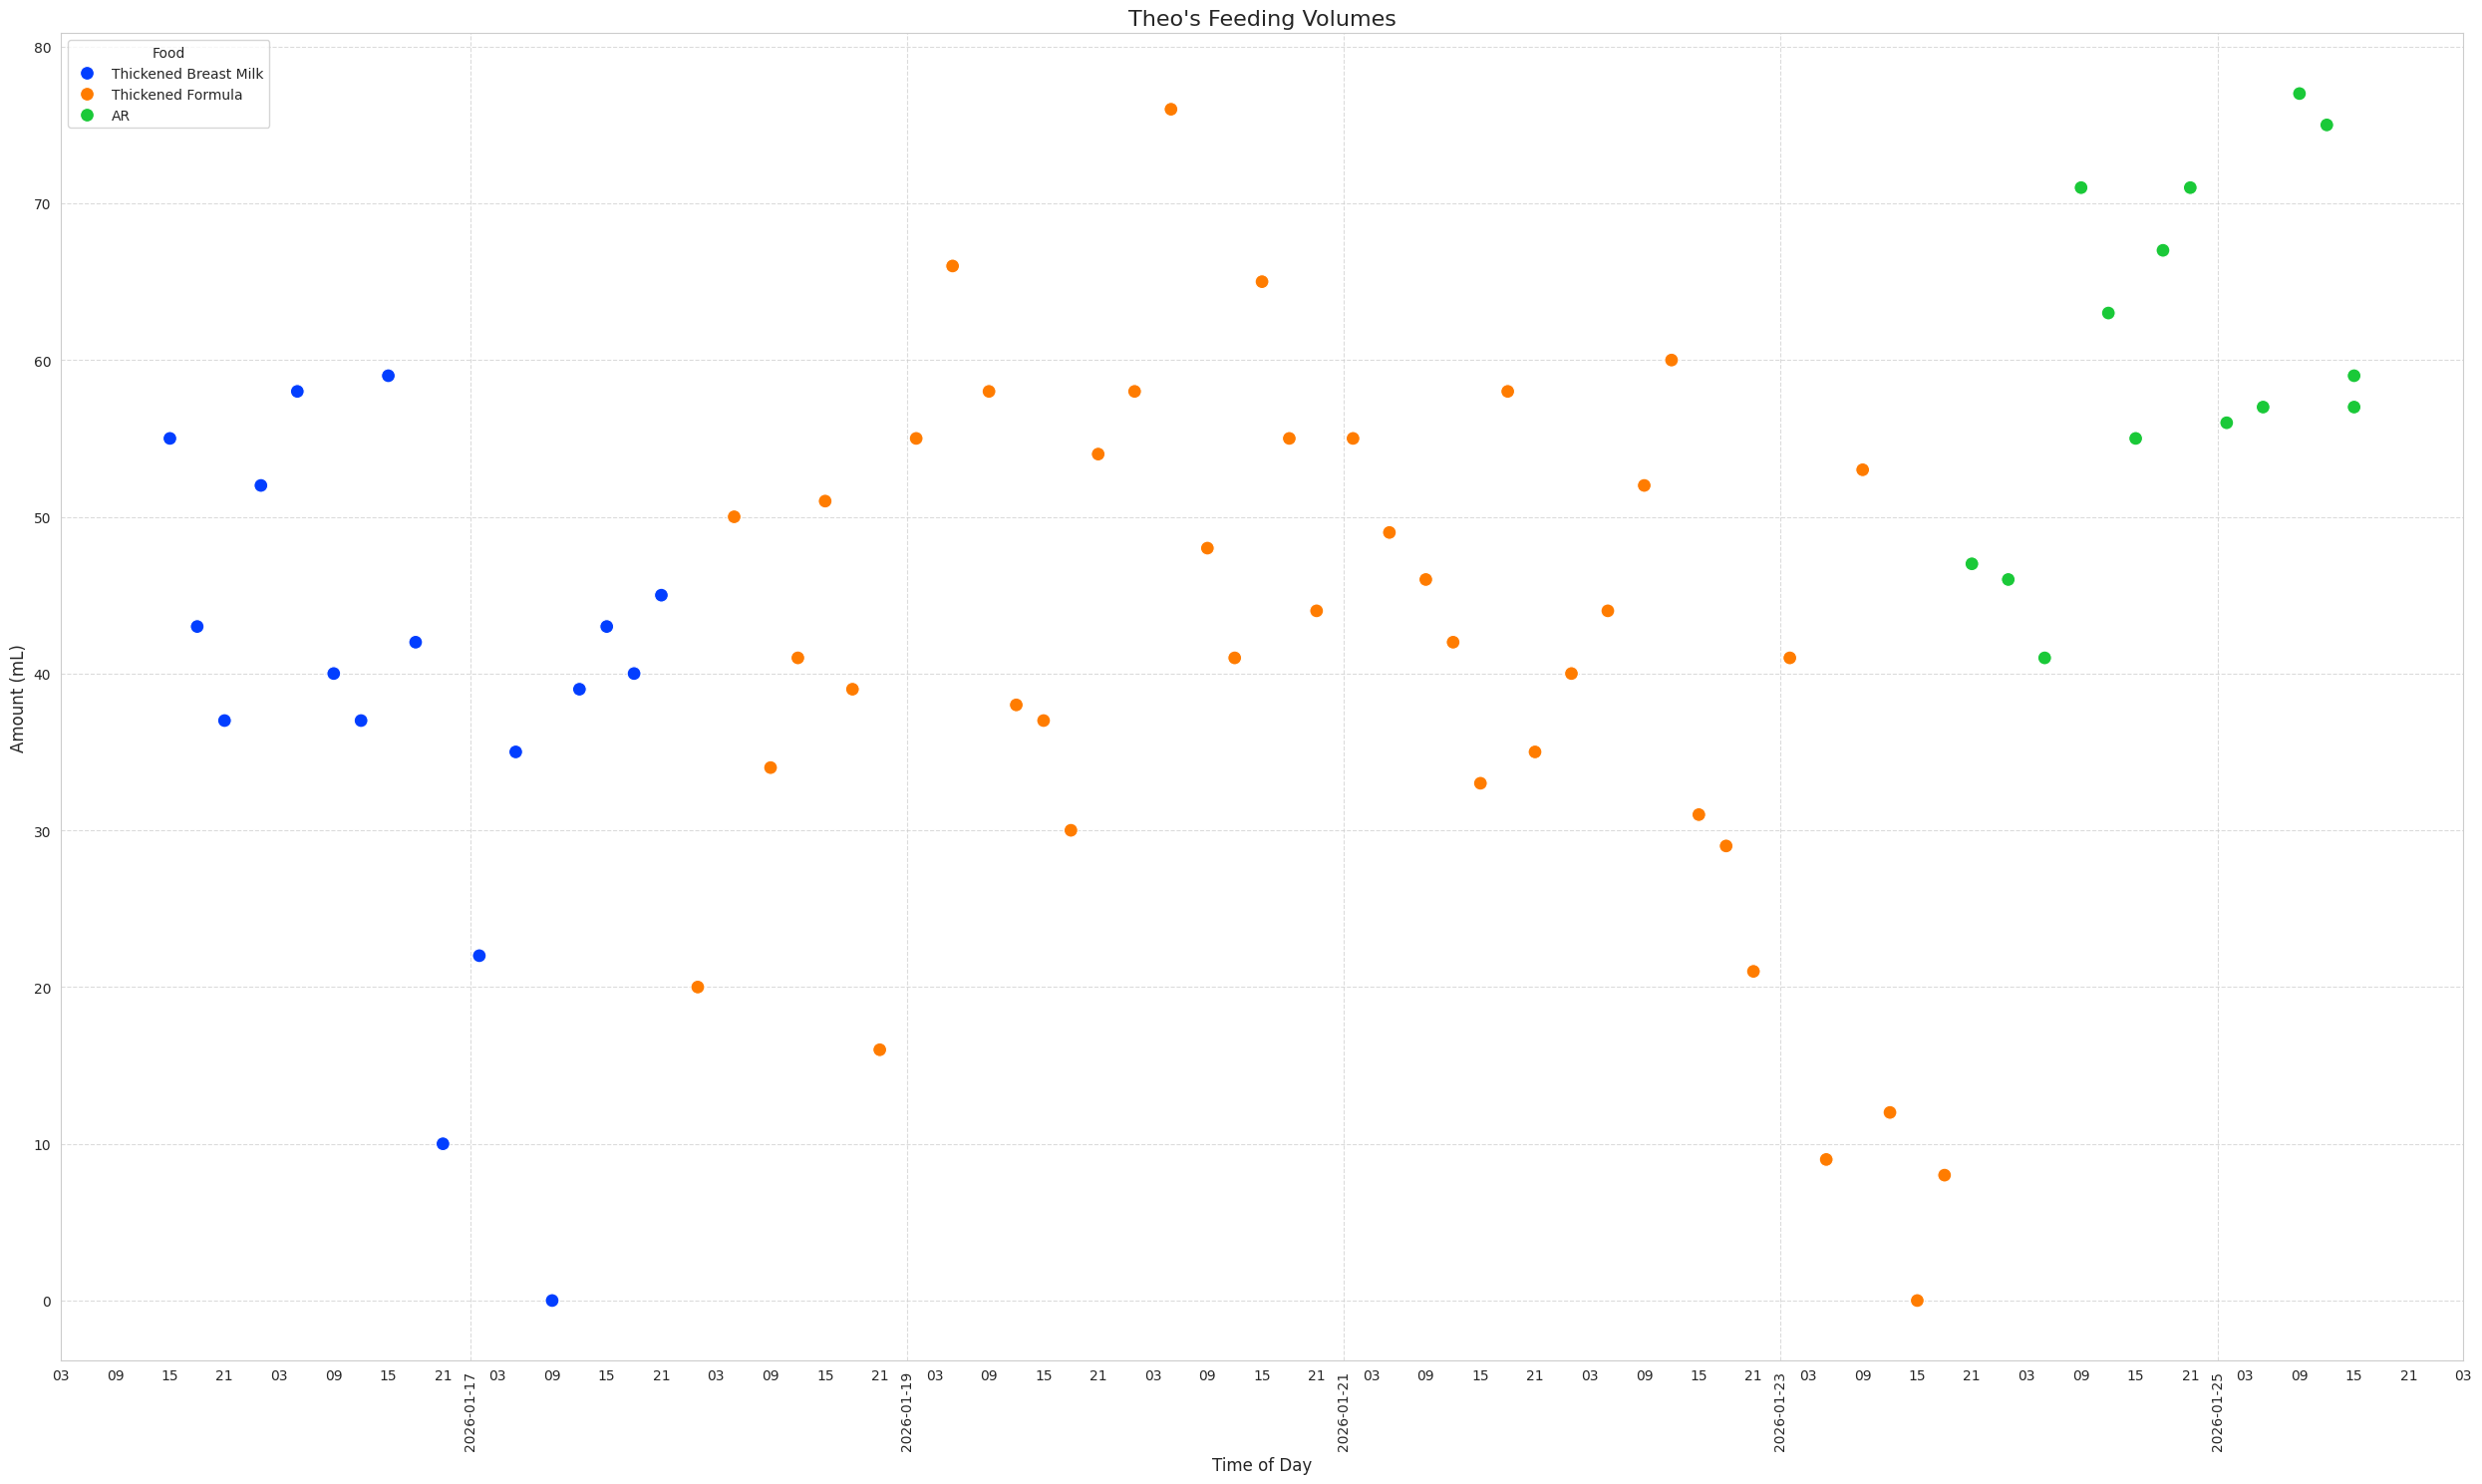

In [5]:
amounts = df['Volume [mL]'] # Amount in ml
times = df['datetime_col']

# 2. Setup the Plot
fig, ax = plt.subplots(figsize=(25, 15))

# 3. Plot the data
# Plotting with a marker 'o' to see specific feed times
xticks = df.datetime_col.to_list()
#ax.plot(times, amounts, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)
sns.scatterplot(data=df,x='datetime_col', y='Volume [mL]', hue='Food', palette='bright',s=100)

# 4. Customize the plot (Labels, Title, Formatting)
ax.set_title("Theo's Feeding Volumes", fontsize=16)
ax.set_ylabel("Amount (mL)", fontsize=12)
ax.set_xlabel("Time of Day", fontsize=12)

# Format the X-axis to show hours clearly
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%I:%M'))
#fig.autofmt_xdate() # Rotates the labels to prevent overlap
plt.xticks(rotation=90)
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=None, interval=6, tz=None))
date_form = mdates.DateFormatter("%H")
ax.xaxis.set_minor_formatter(date_form)

# Add grid lines for easier reading
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

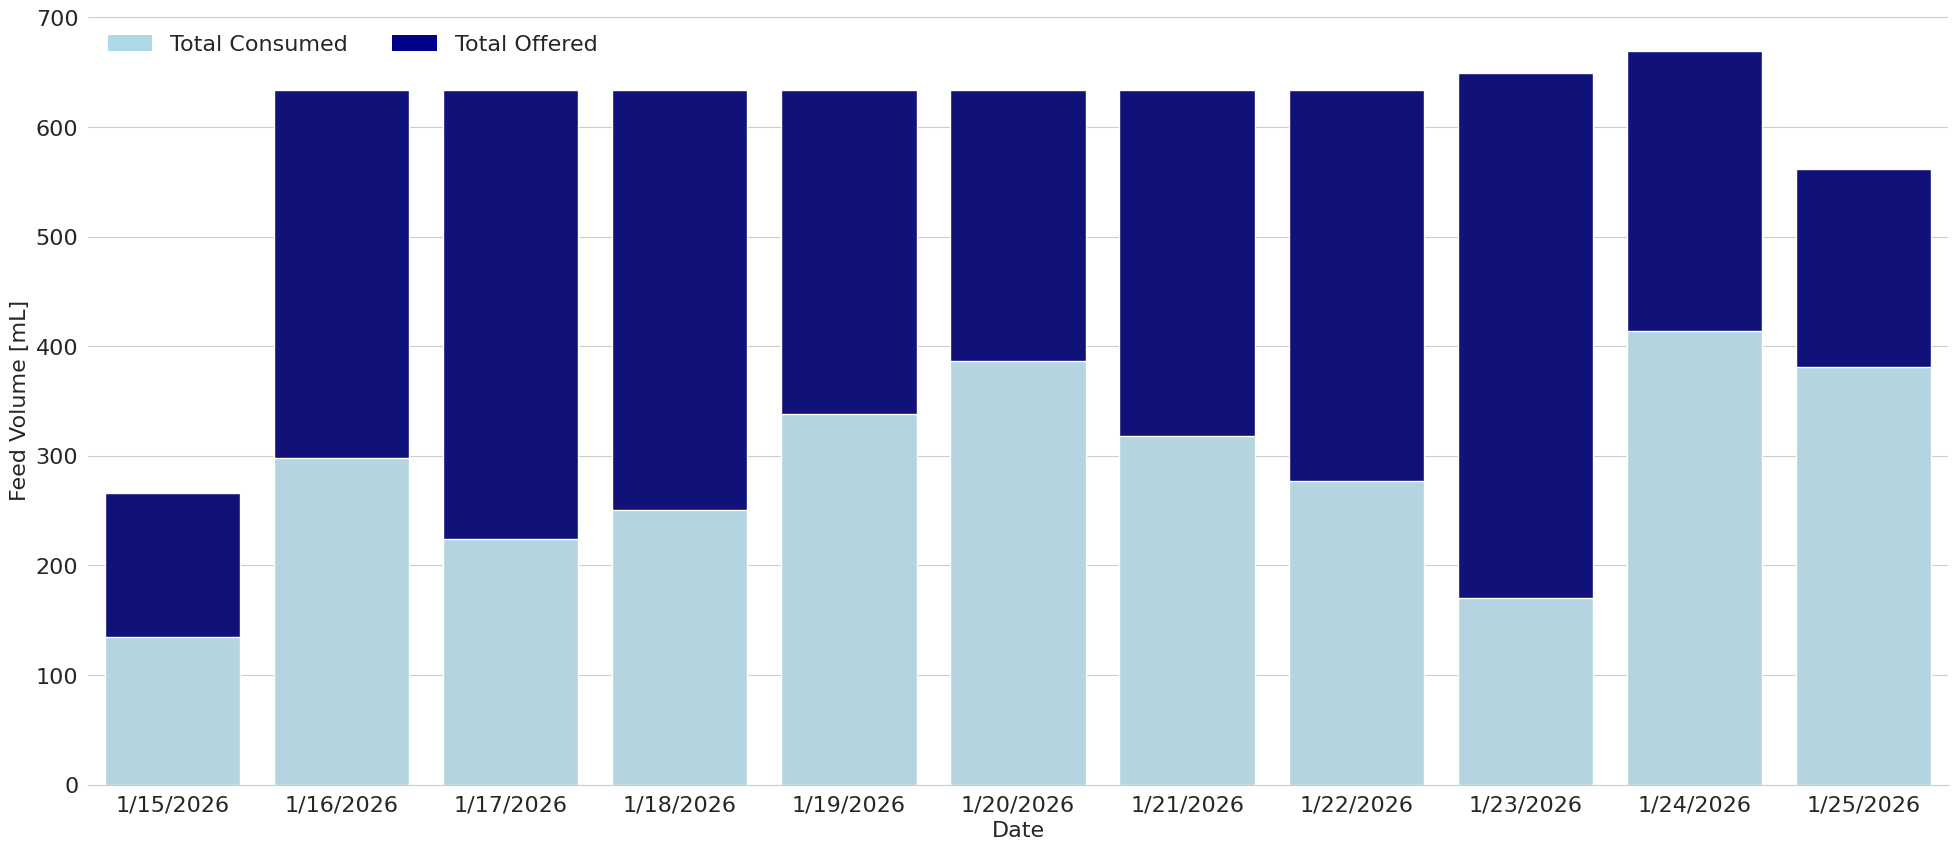

In [6]:
# Create Bar Plot
dailyTotals = df.groupby('Date')['Volume [mL]'].sum().reset_index()
dailyMax = df.groupby('Date')['Total Feed Volume [mL]'].sum().reset_index()

#Set general plot properties
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "Total Offered"
sns.barplot(x = dailyMax['Date'], y = dailyMax['Total Feed Volume [mL]'], color = "darkblue")

#Plot 2 - overlay - "Total Daily Consumption"
bottom_plot = sns.barplot(x = dailyTotals['Date'], y = dailyTotals['Volume [mL]'], color = "lightblue")


topbar = plt.Rectangle((0,0),1,1,fc="darkblue", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='lightblue',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Total Consumed', 'Total Offered'], loc=0, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Feed Volume [mL]")
bottom_plot.set_xlabel("Date")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

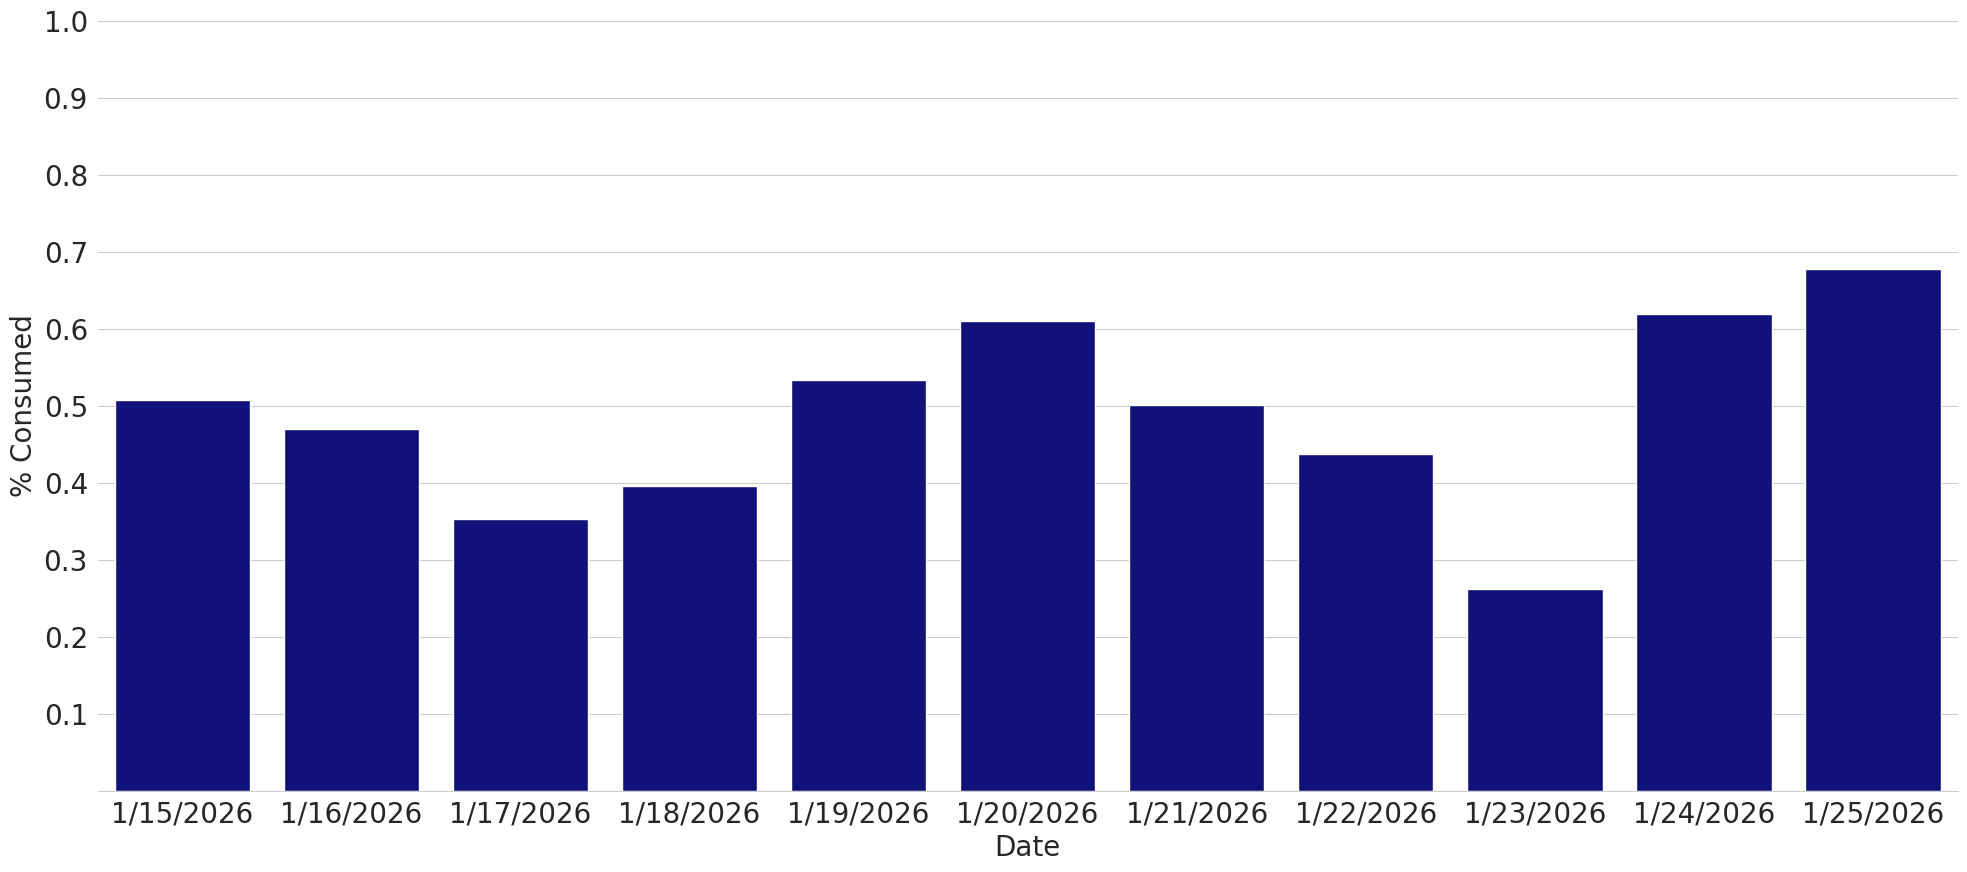

In [25]:
# Create Bar Plot
dailyTotals = df.groupby('Date')['Volume [mL]'].sum().reset_index()
dailyMax = df.groupby('Date')['Total Feed Volume [mL]'].sum().reset_index()
dailyPercent = dailyTotals['Volume [mL]']/dailyMax['Total Feed Volume [mL]']
#Set general plot properties
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "Total Offered"
ax = sns.barplot(x = dailyMax['Date'], y = dailyPercent, color = "darkblue")

topbar = plt.Rectangle((0,0),1,1,fc="darkblue", edgecolor = 'none')

#Optional code - Make plot look nicer
sns.despine(left=True)
ax.set_ylabel("% Consumed")
ax.set_xlabel("Date")
desired_ticks = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
ax.set_yticks(ticks=desired_ticks) 
#Set fonts to consistent 16pt size
for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)